In [25]:
#--------------------------------
# General Analysis Settings

# basepath: This defines the base directory for storing all the generated analysis files. 
# It should have at least 10-20 GB free. 
basepath = '/data/GCE_sys/'

# tag: All the generated files carry this tag. Should be descriptive of analysis.
tag = 'P7REP_CLEAN_V15_calore_half_deg' 

#--------------------------------
# Energy Binning Settings
# The energy binning by default matches that of Calore et al 2014 (see 1409.0042 Eq.2 and discussion)
# This consists of a few linear spaced bins at low energies followed by a rescursive binning definition.
# If custom binning is required, just set the bin edges using prefix_bins=... and change n_bins=0
prefix_bins=[300, 350, 400, 450, 500] # Fixed bins go here and are prepended to any additional recursive bins
# These 4 settings are for recursive bin definitions.  To disable set n_bins=0
n_bins = 20 # number of recursive bins
E_min = 5e2 # Starting recusrion energy
E_max = 5e5 # Max recursion energy
gamma = 1.45 # Recursion index. 

#--------------------------------
# Spatial Binning
healpix_order = 7 # Healpix order.  8 gives ~0.24 degree pixel edge width.  Increase of 1 halves the bin size.

#--------------------------------
# Fermitools settings

# phfile input to gtselect. Can be merged photon file or a text file containing paths of each weekly file
phfile_raw = '/data/fermi_data_1-8-14/phfile.txt' 


# scfile [filename]
#           Spacecraft data file containing information such as the spacecraft
#           pointing as a function of time. This file could be generated by
#           gtorbsim for simulated observations (see the gtorbsim help for further
#           explanation) or it can be obtained from the FERMI
#           Science Support Center (FSSC) website for real observations.
scfile = '/data/fermi_data_1-8-14/lat_spacecraft_merged.fits' # Path to spacecraft file


# (evclass) [integer] 
#          Event class selection for pass 7 reprocessed data. The 
#          default is 2 (source class). Other values are 0 for transient
#          data, 3 for the clean data class and 4 for the ultraclean data
#          class. 1 is currently unused. 
evclass = 3 # FermiTools evclass


#     (convtype) [integer]
#          Conversion type. This parameter screens events based on which
#          portion of the instrument the incident gamma-ray pair conversion
#          event occurred. 0=Front, 1=Back, -1=both (defalt value). Refer 
#          to the Cicerone manual for details
#          (http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone).
convtype = -1

# filter [string]
#           This is the filter expression. The cuts are make using C-style
#           relational syntax like for example: ! (not), && (and), || (or), !=
#           (different), >, <, >=, <=, abs(), cos(), sin(), etc. Default is 
#           "DATA_QUAL>0 && LAT_CONFIG==1 && ABS(ROCK_ANGLE)<52".

gtfilter = 'DATA_QUAL>0 && LAT_CONFIG==1 && ABS(ROCK_ANGLE)<52' # gtmktime cut

# The fermi instrument response function.  Can get full list via command gtirfs
# ******MAKE SURE THIS MATCHES evclass and convtype above!************
# Some common ones....
# P7REP_CLEAN_V15 ( = P7REP_CLEAN_V15::FRONT + P7REP_CLEAN_V15::BACK )
# P7REP_CLEAN_V15::BACK
# P7REP_CLEAN_V15::FRONT
# P7REP_SOURCE_V15 ( = P7REP_SOURCE_V15::FRONT + P7REP_SOURCE_V15::BACK )
# P7REP_SOURCE_V15::BACK
# P7REP_SOURCE_V15::FRONT
# P7REP_ULTRACLEAN_V15 ( = P7REP_ULTRACLEAN_V15::FRONT + P7REP_ULTRACLEAN_V15::BACK )
# P7REP_ULTRACLEAN_V15::BACK
# P7REP_ULTRACLEAN_V15::FRONT
irf = 'P7REP_CLEAN_V15' 


# zmax [double]
#          Maximum apparent zenith angle (degrees). It ranges from 0 to 180 (default).
zmax = 100  # Max zenith angle cut

#---------------------------------------------------------
# Some file paths containing fermi data. 

# path to 3FGL file (or 2FGL)
# can download this at http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v14.fit
#      (2FGL is at at: http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v08.fit)
fglpath = '/data/gll_psc_v14.fit' # 
#fglpath = '/data/gll_psc_v08.fit' # 

# Path to a fermi diffuse model.  Used only to calculate point source masking per Calore et al.
# Can get this at http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html
path_to_diffuse_model = '/data/fermi_background_models/gll_iem_v05_rev1.fit'





#---------------------------------------------------------
# Run this thing....
from Analysis import Analysis

A = Analysis( E_min, E_max, 2**healpix_order, gamma, n_bins, prefix_bins, tag, basepath, phfile_raw,
                    scfile, evclass, convtype,  zmax, irf, fglpath, gtfilter)

# A.GenFermiData(runscript=True)
# A.GenExposureMap()
# A.GenPointSourceTemplate()
# A.GenPointSourceTemplate(pscmap=(A.basepath + '/PSC_' + A.tag + '_fgl2.npy'))
# A.GenPointSourceTemplate()
# A.BinPhotons(outfile='binned_photons_'+A.tag+'.npy')
A.AddFermiDiffuseModel(diffuse_path=path_to_diffuse_model,
                       outfile='fermi_diffuse_'+A.tag+'.npy', multiplier=1.)

Remapping Fermi Diffuse Model to Healpix Grid 100.00 %


In [2]:
A.GenPointSourceTemplate(pscmap=(A.basepath + '/PSC_' + A.tag + '_fgl3.npy'))

Generating Point Source Map: 99.97 %

array([[  1.42548919e+00,   1.44152212e+00,   1.44104731e+00, ...,
          1.45204842e+00,   1.44702840e+00,   1.37273717e+00],
       [  7.54535139e-01,   7.61536717e-01,   7.64942288e-01, ...,
          9.24795985e-01,   9.16351080e-01,   8.59342039e-01],
       [  4.38232869e-01,   4.41385001e-01,   4.45639700e-01, ...,
          6.41754627e-01,   6.32771015e-01,   5.87771118e-01],
       ..., 
       [  2.25275071e-04,   2.26705932e-04,   2.28977122e-04, ...,
          7.73772306e-04,   6.81557169e-04,   5.82214270e-04],
       [  1.45961501e-04,   1.46911421e-04,   1.48328778e-04, ...,
          4.97809437e-04,   4.42384335e-04,   3.78239900e-04],
       [  1.28726533e-04,   1.29099542e-04,   1.30236207e-04, ...,
          2.88023934e-04,   2.65425566e-04,   2.34820996e-04]], dtype=float32)

In [6]:
A.PopulateROI((0,0),360,360,include_point=False,include_extended=True)

Populating ROI with point sources: 123 of 3034
Populating ROI with point sources: 603 of 3034
Populating ROI with point sources: 640 of 3034
Populating ROI with point sources: 697 of 3034
Populating ROI with point sources: 930 of 3034
Populating ROI with point sources: 956 of 3034
Populating ROI with point sources: 1001 of 3034
Populating ROI with point sources: 1568 of 3034
Populating ROI with point sources: 1624 of 3034
Populating ROI with point sources: 1848 of 3034
Populating ROI with point sources: 1963 of 3034
Populating ROI with point sources: 1966 of 3034
Populating ROI with point sources: 2020 of 3034
Populating ROI with point sources: 2120 of 3034
Populating ROI with point sources: 2275 of 3034
Populating ROI with point sources: 2287 of 3034
Populating ROI with point sources: 2355 of 3034
Populating ROI with point sources: 2393 of 3034
Populating ROI with point sources: 2406 of 3034
Populating ROI with point sources: 2441 of 3034
Populating ROI with point sources: 2500 of 303

In [8]:
A.PrintTemplates()
PSC = np.load(A.basepath + '/PSC_' + A.tag + '_fgl3.npy')

                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
             PuppisA              [None, None]  1.000e+00      False      False        FGL
       HESSJ1614n518              [None, None]  1.000e+00      False      False        FGL
       HESSJ1616n508              [None, None]  1.000e+00      False      False        FGL
           CenALobes              [None, None]  1.000e+00      False      False        FGL
       HESSJ1632n478              [None, None]  1.000e+00      False      False        FGL
       HESSJ1837n069              [None, None]  1.000e+00      False      False        FGL
                 SMC              [None, None]  1.000e+00      False      False        FGL
                 W28              [None, None]  1.000e+00      False      False        FGL
                 W44              [None, None]  1.000e+00      False      False        FGL
              VelaJr              [None, None]  1.000e+00      False      False        FGL

In [11]:
ext_PSC = np.zeros(PSC.shape)

for key, t in A.templateList.items():
    if t.sourceClass == 'FGL':
        print key
        ext_PSC += t.healpixCube.toarray()

PuppisA
HESSJ1614n518
HESSJ1616n508
CenALobes
HESSJ1632n478
HESSJ1837n069
SMC
W28
W44
VelaJr
RXJ1713_7n3946
HESSJ1303n631
IC443
S147
HB21
CygnusCocoon
HESSJ1825n137
MSH15n52
W30
gammaCygni
W51C
CygnusLoop
HESSJ1841n055
VelaX
LMC


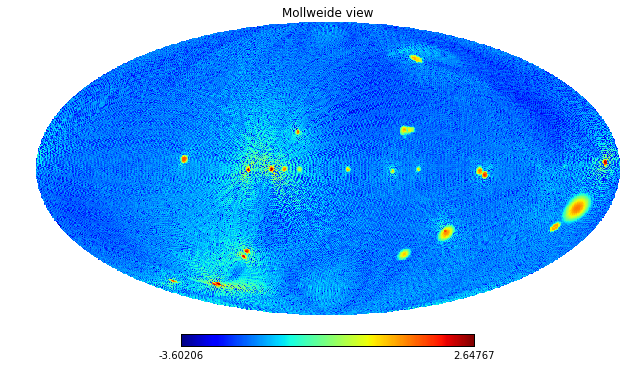

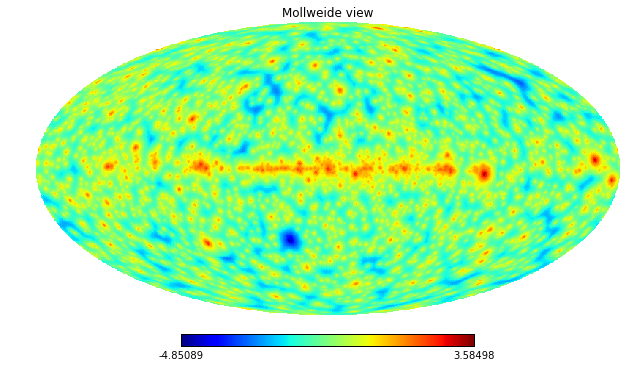

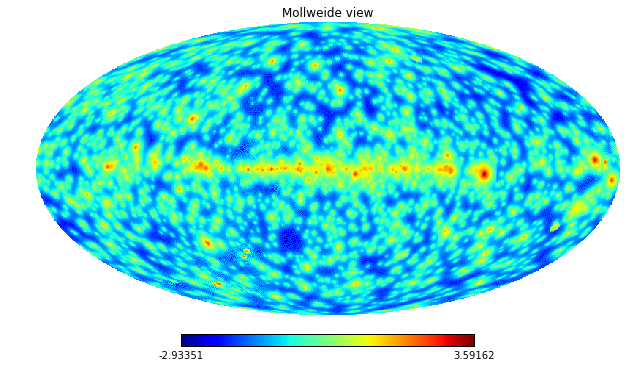

In [17]:
import healpy
healpy.mollview(np.log10(ext_PSC[5]))
healpy.mollview(np.log10(PSC[5]))
total = PSC+ext_PSC
m = healpy.mollview(np.log10(total[5]), return_projected_map=True)

In [22]:
np.save(A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy',total.astype((np.float32)))

In [211]:
import Analysis
import cPickle as pickle
import Tools
import multiprocessing as mp 
import pyfits
import numpy as np
import h5py
import sys

def GenDiffuse(self, basedir='/data/galprop2/output/',
               tag='NSPEB_no_secondary_HI_H2', verbosity=0, multiplier=1., nrings=9.,
                E_subsample=1, fixSpectrum=True):
        """
        This method takes a base analysis prefix, along with an X_CO profile and generates the combined diffuse template,
        or components of the diffuse template.

        :param basedir: Base directory to read from
        :param tag: Tag for the galprop file.  This is the part between '_54_' and '.gz'.
        :param verbosity: 0 is quiet, >1 prints status.
        """

        if verbosity>0:
            print 'Loading FITS'
        sample = pyfits.open(basedir+'/bremss_healpix_54_'+tag+'.gz')

        energies = sample[2].data.field(0)
        nside_in = sample[1].data.shape[0]
        comps, comps_new = {}, {}
#         # For some reason, older versions of galprop files have slightly different data structures.  This try/except
#         # will detect the right one to use. 
         
#         try:
#             comps['ics'] = pyfits.open(basedir+'/ics_isotropic_healpix_54_'+tag+'.gz')[1].data.field(0).T
#             nside_in = np.sqrt(comps['ics'].shape[1]/12)
#             comps['pi0'] = pyfits.open(basedir+'/pi0_decay_healpix_54_'+tag+'.gz')[1].data.field(0).T
#             comps['brem'] = pyfits.open(basedir+'/bremss_healpix_54_'+tag+'.gz')[1].data.field(0).T

        #except:
        def ReadFits(fname, length):
            d = pyfits.open(fname)[1].data
            # Resize input healpix maps if needed.
            if self.nside != nside_in:
                return np.array([Tools.ResizeHealpix(d.field(i), self.nside, average=True) for i in range(length)])
                
            return np.array([d.field(i) for i in range(length)])
        
        # Add up the HI and HII contributions into a single template since nothing there is varying.
        pi0HIHII = np.zeros((len(energies), 12*self.nside**2))
        bremHIHII = np.zeros((len(energies), 12*self.nside**2))
        
        for i_ring in range(1,nrings+1):
            print "Adding HI/HII ring", i_ring
            bremHIHII += ReadFits(basedir+'/bremss_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            bremHIHII += ReadFits(basedir+'/bremss_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0HIHII += ReadFits(basedir+'/pi0_decay_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0HIHII += ReadFits(basedir+'/pi0_decay_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
        comps['pi0HIHII'] = pi0HIHII + 1.25*bremHIHII
        # comps['pi0HIHII'] = pi0HIHII
        # comps['bremHIHII'] = bremHIHII
        comps_new['pi0HIHII'] =  np.zeros((self.n_bins, 12*self.nside**2))
        # comps_new['bremHIHII'] =  np.zeros((self.n_bins, 12*self.nside**2))
        

        for i_ring in range(1,nrings+1):
            print "Adding H2 ring", i_ring
            brem = ReadFits(basedir+'/bremss_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi = ReadFits(basedir+'/pi0_decay_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            comps['pi0_H2_'+str(i_ring)] = pi + 1.25*brem

            # comps['pi0_H2_'+str(i_ring)] = pi 
            # comps['brem_H2_'+str(i_ring)]= brem
            comps_new['pi0_H2_'+str(i_ring)] =  np.zeros((self.n_bins, 12*self.nside**2))
            # comps_new['brem_H2_'+str(i_ring)] = np.zeros((self.n_bins, 12*self.nside**2))
            
        
        
        comps['ics'] = np.zeros((len(energies), 12*self.nside**2))
        comps_new['ics'] = np.zeros((self.n_bins, 12*self.nside**2))
        for i_ics in range(1,4):
            print "Adding ics", i_ics
            comps['ics'] += ReadFits(basedir+'/ics_isotropic_comp_'+str(i_ics)+'_healpix_54_'+tag+'.gz', len(energies))
#             comps['ics_'+str(i_ics)] = ReadFits(basedir+'/ics_isotropic_comp_'+str(i_ics)+'_healpix_54_'+tag+'.gz', len(energies))
#             comps_new['ics_'+str(i_ics)] = np.zeros((self.n_bins, 12*self.nside**2))
        
        nside_in = np.sqrt(comps['pi0HIHII'].shape[1]/12)
        
        #---------------------------------------------------------------------------------
        # Now we integrate each model over the energy bins...
        #
        # Multiprocessing for speed. There is an async callback which applies each result to
        # the arrays.  Not sure why RunAsync needs new thread pool for each component, but this
        # works and decreases memory footprint.
        def callback(result):
            idx, comp, dat = result
            comps_new[comp][idx] = dat

        def RunAsync(component):
            p = mp.Pool(mp.cpu_count())
            for i_E in range(self.n_bins):
                p.apply_async(Tools.AsyncInterpolateHealpix,
                              [comps[component], energies, self.bin_edges[i_E], self.bin_edges[i_E+1],
                               i_E, component, E_subsample, self.nside],
                              callback=callback)
            p.close()
            p.join()

        # For each component, run the async sampling/sizing.
        for key in comps:
            if verbosity>0:
                print 'Integrating and Resampling', key, 'templates...'
                sys.stdout.flush()
            for i_E in range(self.n_bins):
                comps_new[key][i_E] = Tools.InterpolateHealpix(comps[key], energies,  
                    self.bin_edges[i_E], self.bin_edges[i_E+1], E_bins=E_subsample, nside_out=self.nside)
            # Parallel version. (very memory hungry)
            #RunAsync(key)


        #---------------------------------------------------------------------------------
        # Now we just need to add the templates to the active template stack
        print 'Adding Templates to stack'
        
        self.AddTemplate(name='pi0HIHII', healpixCube=comps_new['pi0HIHII'], fixSpectrum=fixSpectrum, fixNorm=False,
                           value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)
        # self.AddTemplate(name='bremHIHII', healpixCube=comps_new['bremHIHII'], fixSpectrum=fixSpectrum, fixNorm=False,
                           # value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)

        for i_ring in range(1,nrings+1):
            self.AddTemplate(name='pi0_H2_'+str(i_ring), healpixCube=comps_new['pi0_H2_'+str(i_ring)], fixSpectrum=fixSpectrum, fixNorm=False,
                           value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)
            
            # self.AddTemplate(name='brem_H2_'+str(i_ring), healpixCube=comps_new['brem_H2_'+str(i_ring)], fixSpectrum=fixSpectrum, fixNorm=False,
            #                value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)
        
#         for i_ics in range(1,4):
#             self.AddTemplate(name='ics_'+str(i_ics), healpixCube=comps_new['ics_'+str(i_ics)], fixSpectrum=fixSpectrum, fixNorm=False,
#                            value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)
        self.AddTemplate(name='ics', healpixCube=comps_new['ics'], fixSpectrum=fixSpectrum, fixNorm=False,
                       value=1., ApplyIRF=True,noPSF=True, sourceClass='GEN', limits=[None, None], multiplier=multiplier)

        return self







def WriteHDF5(fname, basedir, tag, m , nrings=9):
    """
    Build the diffuse model according to the best fit parameters and writes model+metadata to an HDF5 file.
    
    :param fname: Output filename for the HDF5 file
    :param basedir: Directory with galprop output files
    :param tag: galprop tag
    :param basedir: iminuit object. 
    :param nrings: number of galprop rings.
    """
    modf = h5py.File(fname, 'w')

    if m is not None:
        X_CO = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,nrings+1)])
    
    #modf = h5py.File(fname, 'w')
    #try:
    # Generate Groups
    # template_group = modf.create_group("templates")
    # fit_group = modf.create_group("fit_results")


    # Get data dimensions
    tmp = pyfits.open(basedir+'/bremss_healpix_54_'+tag+'.gz')
    energies = tmp[2].data.field(0)
    tShape = (len(energies), tmp[1].data.shape[0])
    print tShape
    del tmp # free memory

    pi0     = modf.create_dataset("/templates/pi0", tShape, dtype='float32',compression="gzip")
    pi0_0   = modf.create_dataset("/templates/pi0_0", tShape, dtype='float32',compression="gzip")
    brem   = modf.create_dataset("/templates/brem", tShape, dtype='float32',compression="gzip")
    brem_0 = modf.create_dataset("/templates/brem_0", tShape, dtype='float32',compression="gzip")
    ics_opt = modf.create_dataset("/templates/ics_opt", tShape, dtype='float32',compression="gzip")
    ics_fir = modf.create_dataset("/templates/ics_fir", tShape, dtype='float32',compression="gzip")
    ics_cmb = modf.create_dataset("/templates/ics_cmb", tShape, dtype='float32',compression="gzip")
    modf.create_dataset("/templates/energies", data=energies, dtype='float32',compression="gzip")
    # Now fill in the templates one by one.
    # Add fit metadata.
    # Add galdef metadata.


    #---------------------------------------------------------------
    # Create Diffuse Template from fitting results.
    def ReadFits(fname, length):
        d = pyfits.open(fname)[1].data
        return np.array([d.field(i) for i in range(length)])

    if m is not None:
        for i_ring in range(1,nrings+1):
            print "Adding HI/HII ring", i_ring

            pi0[...] += m.values['pi0HIHII']*ReadFits(basedir+'/pi0_decay_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0[...] += m.values['pi0HIHII']*ReadFits(basedir+'/pi0_decay_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0[...] += X_CO[i_ring-1]*ReadFits(basedir+'/pi0_decay_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))

            brem[...] += m.values['pi0HIHII']*1.25*ReadFits(basedir+'/bremss_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            brem[...] += m.values['pi0HIHII']*1.25*ReadFits(basedir+'/bremss_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            brem[...] += 1.25*X_CO[i_ring-1]*ReadFits(basedir+'/bremss_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))

            if i_ring == 1:
                pi0_0[...] += pi0
                brem_0[...] += brem

        ics_opt[...] += m.values['ics']*ReadFits(basedir+'/ics_isotropic_comp_1_healpix_54_'+tag+'.gz', len(energies))
        ics_fir[...] += m.values['ics']*ReadFits(basedir+'/ics_isotropic_comp_2_healpix_54_'+tag+'.gz', len(energies))
        ics_cmb[...] += m.values['ics']*ReadFits(basedir+'/ics_isotropic_comp_3_healpix_54_'+tag+'.gz', len(energies))

    else:
        for i_ring in range(1,nrings+1):
            print "Adding HI/HII ring", i_ring

            pi0[...] += ReadFits(basedir+'/pi0_decay_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0[...] += ReadFits(basedir+'/pi0_decay_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            pi0[...] += ReadFits(basedir+'/pi0_decay_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))

            brem[...] += ReadFits(basedir+'/bremss_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            brem[...] += ReadFits(basedir+'/bremss_HII_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))
            brem[...] += ReadFits(basedir+'/bremss_H2R_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))

            if i_ring == 1:
                pi0_0[...] += pi0
                brem_0[...] += brem

        ics_opt[...] += ReadFits(basedir+'/ics_isotropic_comp_1_healpix_54_'+tag+'.gz', len(energies))
        ics_fir[...] += ReadFits(basedir+'/ics_isotropic_comp_2_healpix_54_'+tag+'.gz', len(energies))
        ics_cmb[...] += ReadFits(basedir+'/ics_isotropic_comp_3_healpix_54_'+tag+'.gz', len(energies))

#     except:
#         modf.close()
    
    try: 
        modf.close()
    except: pass
    return


def AddMetadata(fname, basedir, tag, A, m, fval=None):
    # Parse the galprop file into a dict.
    galdef_dict = {}
    with open(basedir + '/galdef_54_'+tag) as galdef:
        for line in galdef: 
            if line[0] != "#" and line.strip()!='':
                s = line.strip('\n').split('=')
                if len(s)<2: 
                    continue
                key = s[0].strip()
                if key in ["Title", 'X_CO_values', 'n_X_CO_values', 'X_CO_radius']: continue
                galdef_dict[key] = s[1].strip().split(" ")[0]
    try: h5.close() 
    except: pass
    h5 = h5py.File(fname)
    try:
        galdef_group = h5.create_group("/galdef")
    except: 
        galdef_group = h5['/galdef']
    for key, val in galdef_dict.items():
        #print key, val
        galdef_group.attrs.create(key,val)
    
    if m is not None and A is not None:
        try:
            fit_results = h5.create_group("/fit_results/global")
        except: 
            fit_results = h5['/fit_results/global']
        

        


        vals = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,10)])

        fa = fit_results.attrs
        fa.create('globalvalues', m.values.items())
        fa.create('globalvaluesUnc', m.errors.items())
        fa.create('globalfval', m.fval)

        if fval is not None:
            fa.create('localfval', fval[0])            
            fa.create('outerfval', fval[1])            
            fa.create('innerfval', fval[2])            

        fa.create('global_XCO', vals)
        fa.create('globale_bins', A.bin_edges)
        fa.create('globalirf', A.irf)
        fa.create('globalevclass', A.evclass)
        fa.create('globalconvtype', A.convtype)
        fa.create('globalphfile', A.phfile)
        fa.create('globaltag', A.tag)
        h5.create_dataset('/fit_results/globalmask', data=A.mask, dtype='float32')
    h5.close()

    try:
        modf.close()
    except:pass




In [ ]:
#--------------------------------------------------
# Initialize the analysis.
#--------------------------------------------------

basedir, tag, galdefdir, = '/data/galprop2/output/', 'base_2D', '/data/galprop2/GALDEF'
fname = basedir+'/'+tag+'_XCO.hdf5'
#A = pickle.load(open('all_sky_analysis_half_deg.pickle','rb'))

#---------------------------------
# Planck Version
A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore_half_deg', fglpath='/data/gll_psc_v14.fit',  
    templateDir='/data/Extended_archive_v15/Templates', basepath='/data/GCE_sys/', nside=128)

A.BinPhotons(infile='binned_photons_'+A.tag + '.npy')
A.AddPointSourceTemplate(fixNorm=True, pscmap=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy')
A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',
                        psc_model=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                     spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=True, fixNorm=False)
A = GenDiffuse(A, basedir=basedir, tag=tag, verbosity=1, nrings=9)
import cPickle as pickle
pickle.dump(A,open('all_sky_analysis_half_deg.pickle','wb'))


# m, fval, res = RunFit(A, nrings=9)
# WriteHDF5(fname=fname, basedir=basedir, tag=tag, m=m, nrings=9)
# AddMetadata(fname,basedir=galdefdir, tag=tag, A=A, m=m, fval=fval)


In [269]:
import cPickle as pickle
# pickle.dump(A,open('all_sky_analysis_half_deg.pickle','wb'))


basedir, tag, galdefdir, = '/data/galprop2/output/', 'base_2D', '/data/galprop2/GALDEF'
fname = basedir+'/'+tag+'_XCO.hdf5'
A = pickle.load(open('all_sky_analysis_half_deg.pickle','rb'))
A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=True) # External chi^2 used to fix normalization within uncertainties

In [332]:
# Change the PSC template around 

A.AddPointSourceTemplate(fixNorm=True, pscmap=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy')
A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',
                        psc_model=A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=1)

In [333]:

def RunFit(A, nrings=9):
    #-----------------------------------------------------
    # Templates are now added so we fit X_CO
    
    import GammaLikelihood as like
    reload(like)
    
    fval, res = [], []
    for key, t in A.templateList.items():
        # local 
        if key not in ['pi0_H2_7', 'Isotropic','pi0HIHII', 'ics', 'Bubbles']:
            t.fixNorm = True
            t.fixSpectrum= True
            t.limits = [0.0,200.]
            t.value=1.
        else: 
            t.fixNorm = False
            t.limits=[0., None]

            
    print 'Running Local Ring Fit...'
    A.GenSquareMask(l_range=[-180.,180], b_range=[-85.,85.], plane_mask=10.)
    m, R = A.RunLikelihood( print_level=1, precision=None, tol=1e3)[:2]
    fval.append(m.fval)
    res.append(R)

    print 'isotropic value:', A.templateList['Isotropic'].value

    vals = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,nrings+1)])
    print "X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco):", vals

    #-------------------------------------------------------------------
    # Now we have fit the local X_CO (fixed).  Next we fit the outer galaxy
    A.templateList['pi0_H2_7'].fixNorm = True
    A.templateList['Isotropic'].fixNorm = True
    A.templateList['Bubbles'].fixNorm = True
    # Let the outer two rings float
    A.templateList['pi0_H2_8'].fixNorm = False
    A.templateList['pi0_H2_9'].fixNorm = False

    print 'Running Outer Rings Fit...'
    A.GenSquareMask(l_range=[-180,-85], b_range=[-10.,10.], plane_mask=0)
    A.GenSquareMask(l_range=[85,180], b_range=[-10.,10.], plane_mask=0, merge=True)

    m, R = A.RunLikelihood( print_level=1, precision=None, tol=1e3)[:2]
    fval.append(m.fval)
    res.append(R)
    vals = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,nrings+1)])
    print "X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco):", vals


    #-------------------------------------------------------------------
    # Now we fit the inner galaxy X_CO.
    A.templateList['pi0_H2_8'].fixNorm = True
    A.templateList['pi0_H2_9'].fixNorm = True
    # Let the inner 6 rings float
    for i in range(1,7):
        A.templateList['pi0_H2_' + str(i)].fixNorm=False

    print 'Running Inner Rings Fit...'
    A.GenSquareMask(l_range=[-85,85], b_range=[-10.,10.], plane_mask=0)
    m, R = A.RunLikelihood( print_level=1, precision=None, tol=1e3)[:2]
    fval.append(m.fval)
    res.append(R)
    vals = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,nrings+1)])
    print "X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco):", vals
    


    return m, fval, res

A.ResetFit()
A.PrintTemplates()

m, fval, res = RunFit(A, nrings=9)





                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
            pi0HIHII               [0.0, None]  1.000e+00      False       True        GEN
                 PSC              [None, None]  1.000e+00       True       True        PSC
            pi0_H2_1              [0.0, 200.0]  1.000e+00      False       True        GEN
            pi0_H2_9              [0.0, 200.0]  2.845e-01       True       True        GEN
            pi0_H2_3              [0.0, 200.0]  1.000e+00      False       True        GEN
            pi0_H2_2              [0.0, 200.0]  1.000e+00      False       True        GEN
            pi0_H2_5              [0.0, 200.0]  1.000e+00      False       True        GEN
            pi0_H2_4              [0.0, 200.0]  1.000e+00      False       True        GEN
            pi0_H2_7               [0.0, None]  1.520e+00       True       True        GEN
            pi0_H2_6              [0.0, 200.0]  1.000e+00      False       True        GEN

FCN = -14011441.4576 
 TOTAL NCALL = 129 
 NCALLS = 129 
 
 
 EDM = 0.00154512256559 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,1.159730e+00,1.140734e-03,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
4,pi0_H2_9,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
5,pi0_H2_3,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
6,pi0_H2_2,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
7,pi0_H2_5,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
8,pi0_H2_4,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
9,pi0_H2_7,1.513115e+00,4.910222e-03,0.000000e+00,0.000000e+00,0.0,,
10,pi0_H2_6,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED


 Migrad completed fitting   3.76e+01 s
isotropic value: 1.73824173906
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [ 1.         1.         1.         1.         1.         1.         1.5131145
  1.         1.       ]
Running Outer Rings Fit...
Masking completed in 2.8175e-02 s
Code generation completed in 6.9568e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)
ncall/-LL 285 -13171585.9996

FCN = -13171228.921 
 TOTAL NCALL = 288 
 NCALLS = 275 
 
 
 EDM = 0.146737300465 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,1.687206e+00,9.494368e-04,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
4,pi0_H2_9,3.148802e-01,8.429802e-03,0.000000e+00,0.000000e+00,0.0,200.0,
5,pi0_H2_3,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
6,pi0_H2_2,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
7,pi0_H2_5,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
8,pi0_H2_4,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
9,pi0_H2_7,1.513115e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
10,pi0_H2_6,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED


 Migrad completed fitting   9.01e+00 s
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [ 1.          1.          1.          1.          1.          1.          1.5131145
  1.07989194  0.31488016]
Running Inner Rings Fit...
Masking completed in 2.7924e-02 s
Code generation completed in 6.8231e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)
ncall/-LL 545 -12597756.7277

FCN = -12597408.1248 
 TOTAL NCALL = 550 
 NCALLS = 550 
 
 
 EDM = 0.0118754920105 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,1.292894e+00,1.746527e-03,0.000000e+00,0.000000e+00,0.0,,
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,6.062866e-01,3.104330e-02,0.000000e+00,0.000000e+00,0.0,200.0,
4,pi0_H2_9,3.148802e-01,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
5,pi0_H2_3,6.356176e-01,3.102434e-02,0.000000e+00,0.000000e+00,0.0,200.0,
6,pi0_H2_2,6.753717e-02,4.783729e-02,0.000000e+00,0.000000e+00,0.0,200.0,
7,pi0_H2_5,4.124589e-01,8.073860e-03,0.000000e+00,0.000000e+00,0.0,200.0,
8,pi0_H2_4,6.504847e-01,1.278799e-02,0.000000e+00,0.000000e+00,0.0,200.0,
9,pi0_H2_7,1.513115e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,,FIXED
10,pi0_H2_6,1.421919e+00,9.315638e-03,0.000000e+00,0.000000e+00,0.0,200.0,


 Migrad completed fitting   1.47e+01 s
X_CO adjustment (this is not XCO value, it is multiplier for galdef values of xco): [ 0.60628655  0.06753717  0.63561764  0.65048472  0.41245886  1.42191938
  1.5131145   1.07989194  0.31488016]


[0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25]


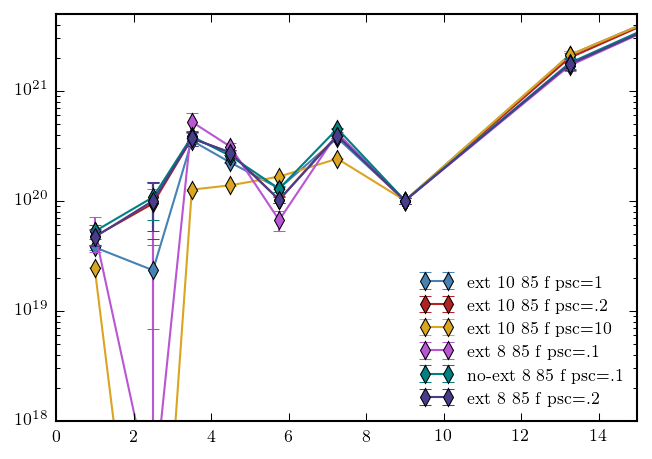

In [335]:
import pyfits
h = pyfits.open('/data/galprop2/FITS/rbands_co10mm_v2_2001_qdeg_9R_new.fits.gz')
rings = [.5*(r1+r2) for r1,r2 in h[1].data]
print rings

X_CO_values = [6.2560429788495372e+19, 3.4680211758611346e+20, 5.5591619439658749e+20, 3.4376189911339867e+20, 3.151243723689986e+20, 2.6276239270686782e+20, 6.6356248035046998e+19, 1.9567428895977403e+21, 6.8600341256635098e+24]
X_CO_radius = [0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25]
X_CO_interp = lambda x: 10**np.interp(np.log10(x), np.log10(X_CO_radius), np.log10(X_CO_values))

vals = np.array([m.values['pi0_H2_'+str(i)] for i in range(1,10)])
err  = np.array([m.errors['pi0_H2_'+str(i)] for i in range(1,10)])

vals, errs = X_CO_interp(rings)*vals, X_CO_interp(rings)*err

import copy
#xco_dict, xco_err_dict = {}, {}

xco_dict['ext_10_85_f_psc=1'] = copy.copy(vals)
xco_err_dict['ext_10_85_f_psc=1'] = copy.copy(errs)


for key, val in xco_dict.items():
    try: 
        plt.errorbar(rings, val, yerr=xco_err_dict[key],  marker='d', label=key.replace('_',' '))
    except:
        plt.errorbar(rings, val,  marker='d', label=key.replace('_',' '))



plt.legend(loc=4, fontsize=8, frameon=False )
plt.xlim(0,15)
plt.ylim(1e18,5e21)
#plt.ylim(0,5e20)
plt.yscale('log')
plt.savefig('/home/carlson/Dropbox/plots/GCE_sys_3D/XCO_variation_fpsc.pdf')

In [44]:
import GammaLikelihood as like
reload(like)

fval, res = [], []
for key, t in A.templateList.items():
    # local 
    t.healpixCube = t.healpixCube.clip(1e-10)
    #if key not in ['pi0_H2_7', 'Isotropic','pi0HIHII', 'ics', 'Bubbles']:
    if key not in ['Isotropic','pi0_H2_1']:
        t.fixNorm = True
        t.fixSpectrum= True
        t.limits = [0.0,200.]
        t.value=1.
        
    else: 
        t.fixNorm = False
        t.limits=[0., None]
        t.value=1

        
A.GenSquareMask(l_range=[-180.,180], b_range=[-80.,80.], plane_mask=10.)
A.PrintTemplates()
m, R = A.RunLikelihood( print_level=1, precision=None, tol=1e3)[:2]




                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
            pi0HIHII              [0.0, 200.0]  1.000e+00       True       True        GEN
                 PSC              [0.0, 200.0]  1.000e+00       True       True        PSC
            pi0_H2_1               [0.0, None]  1.000e+00      False       True        GEN
            pi0_H2_9              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_3              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_2              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_5              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_4              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_7              [0.0, 200.0]  1.000e+00       True       True        GEN
            pi0_H2_6              [0.0, 200.0]  1.000e+00       True       True        GEN

FCN = -4040375.67473 
 TOTAL NCALL = 37 
 NCALLS = 37 
 
 
 EDM = 0.00519283846971 
 GOAL EDM = 0.05 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,pi0HIHII,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
2,PSC,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
3,pi0_H2_1,5.007331e+02,9.999980e-01,0.000000e+00,0.000000e+00,0.0,,
4,pi0_H2_9,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
5,pi0_H2_3,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
6,pi0_H2_2,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
7,pi0_H2_5,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
8,pi0_H2_4,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
9,pi0_H2_7,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED
10,pi0_H2_6,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.0,200.0,FIXED


 Migrad completed fitting   1.07e+01 s


<matplotlib.colorbar.Colorbar instance at 0x7f17728f3c20>

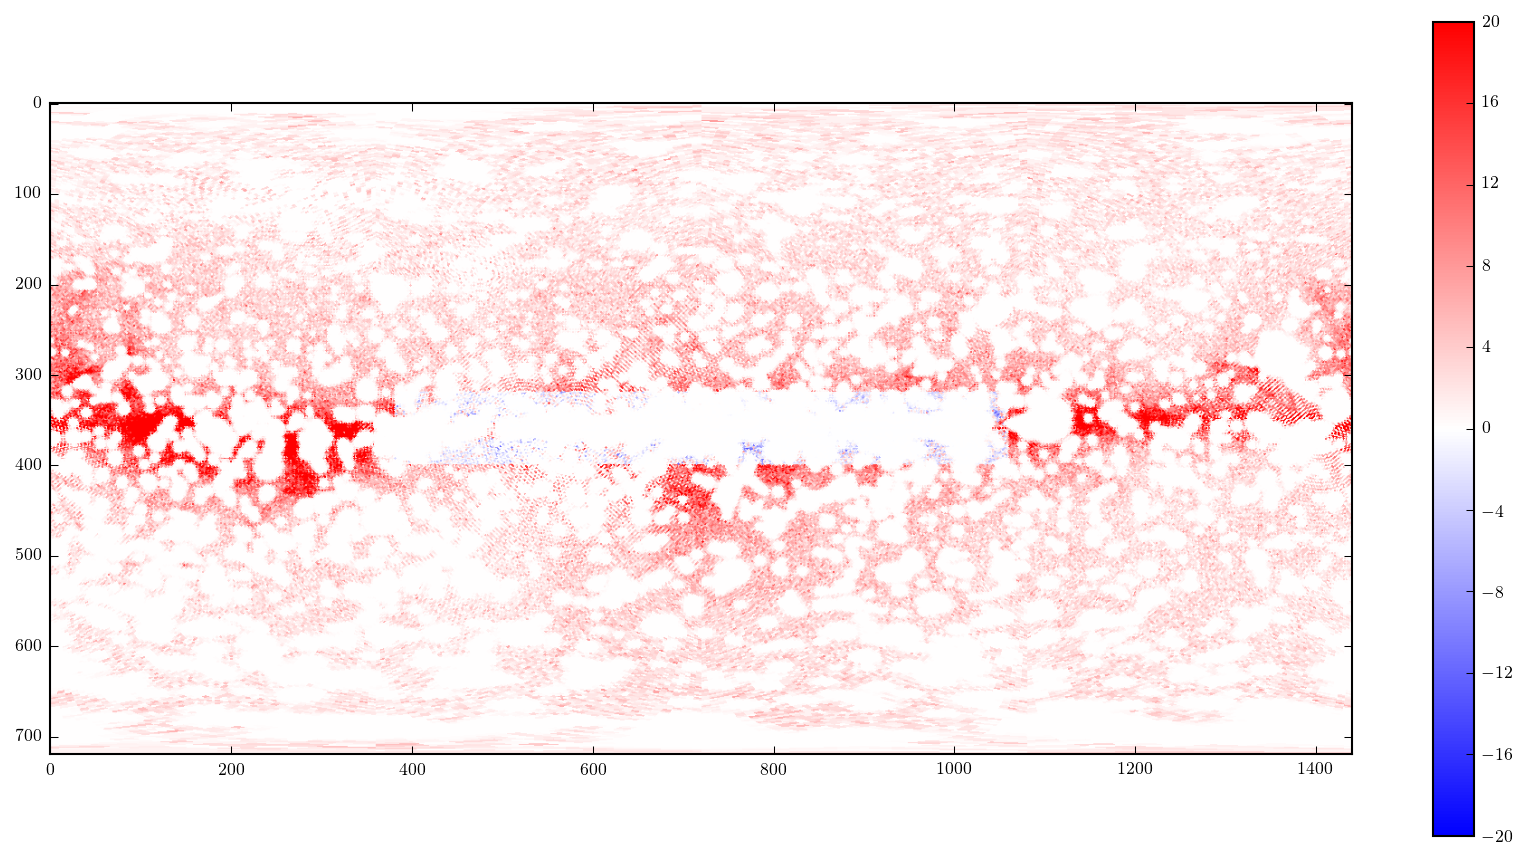

In [323]:
import healpy
#healpy.mollview(np.log10(A.templateList['ics'].healpixCube[1])) #, latra=[-20,20], lonra=[-20,20])
m =healpy.cartview((A.GetResidual()*self.psc_weights)[10], return_projected_map=True,hold=True, xsize=1440)
plt.clf()
plt.figure(figsize=(14,7))
plt.imshow(m,cmap='bwr',vmin=-20,vmax=20)
plt.colorbar()

In [11]:
import time
time.time()

1431131877.238404

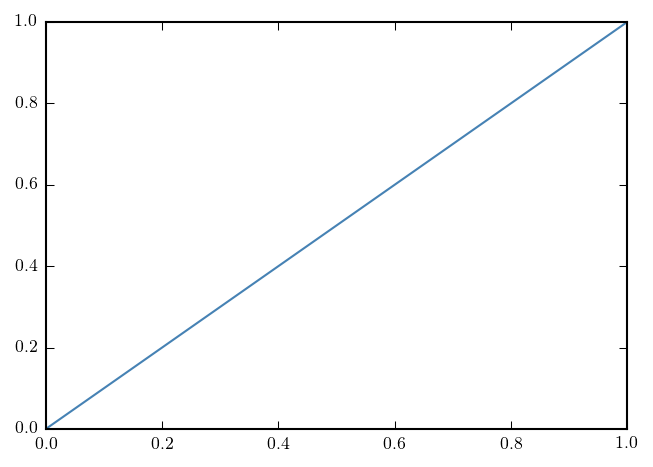

In [23]:
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))

In [5]:
import os
os.environ['THEANO_FLAGS']
os.environ['OMP_NUM_THREADS']

'12'

In [61]:
sample = pyfits.open(basedir+'/bremss_healpix_54_'+tag+'.gz')

energies = sample[2].data.field(0)
nside_in = sample[1].data.shape[0]
comps, comps_new = {}, {}

import Tools
self = A
nrings=9

def ReadFits(fname, length):
    d = pyfits.open(fname)[1].data
    # Resize input healpix maps if needed.
    if self.nside != nside_in:
        return np.array([Tools.ResizeHealpix(d.field(i), self.nside, average=True) for i in range(length)])

    return np.array([d.field(i) for i in range(length)])

# Add up the HI and HII contributions into a single template since nothing there is varying.
pi0HIHII = np.zeros((len(energies), 12*self.nside**2))
bremHIHII = np.zeros((len(energies), 12*self.nside**2))

for i_ring in range(1,nrings+1):
    print "Adding HI/HII ring", i_ring
    bremHIHII += ReadFits(basedir+'/bremss_HIR_ring_'+str(i_ring)+'_healpix_54_'+tag+'.gz', len(energies))

Adding HI/HII ring 1
Adding HI/HII ring 2
Adding HI/HII ring 3
Adding HI/HII ring 4
Adding HI/HII ring 5
Adding HI/HII ring 6
Adding HI/HII ring 7
Adding HI/HII ring 8
Adding HI/HII ring 9


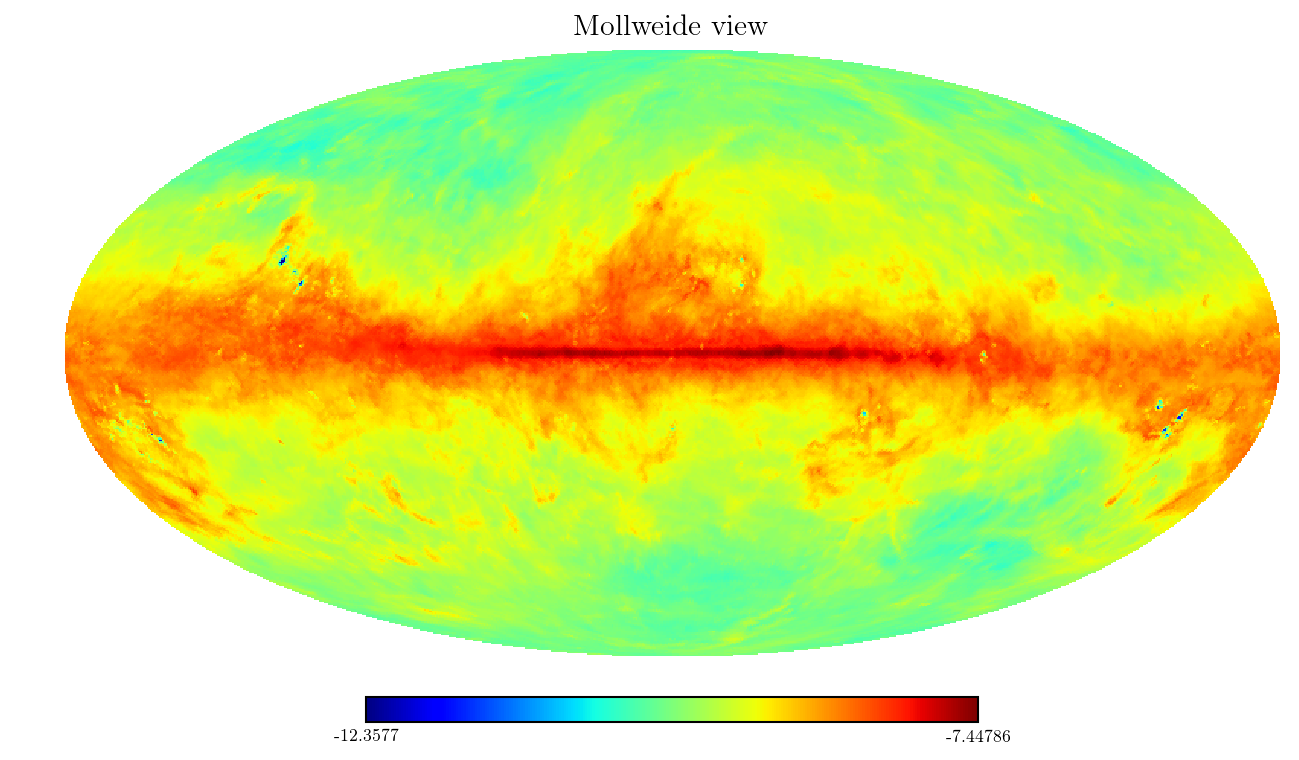

In [186]:
healpy.mollview(np.log10(bremHIHII[10]))

In [194]:
comps['pi0HIHII'] = bremHIHII
import copy
for key in comps:
    comps_new[key] = np.zeros(A.binned_data.shape)
    print 'Integrating and Resampling', key, 'templates...'
    sys.stdout.flush()
    for i_E in range(self.n_bins):
        comps_new[key][i_E] = Tools.InterpolateHealpix(copy.copy(comps[key]), energies,  
            self.bin_edges[i_E], self.bin_edges[i_E+1], E_bins=3, nside_out=self.nside)
    # Parallel version. (very memory hungry)
    #RunAsync(key)

Integrating and Resampling pi0HIHII templates...


(24, 196608)
(24, 196608)


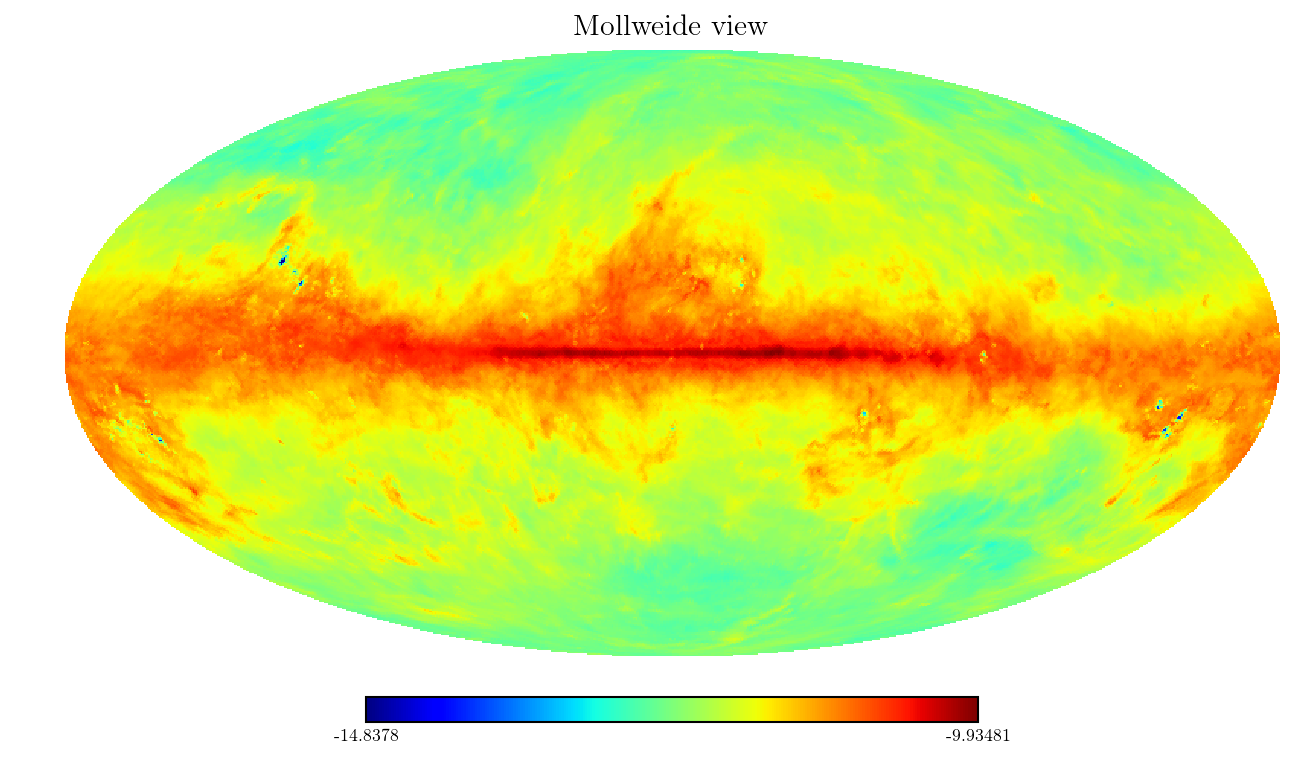

In [195]:
print comps_new['pi0HIHII'].shape
print A.binned_data.shape
healpy.mollview(np.log10(comps_new['pi0HIHII'][10]))

In [206]:
import Template
def AddTemplate(self, name, healpixCube, fixSpectrum=False, fixNorm=False, limits=[None, None], value=1, ApplyIRF=True,
                    sourceClass='GEN', multiplier=1., valueUnc=None, noPSF=False):
        """
        Add Template to the template list.

        :param    name:   Name to use for this template.
        :param    healpixCube: Actually a 2-d array with first index selecting energy and second index selecting the
                    healpix index
        :param    fixSpectrum: If True, the relative normalizations of each energy bin will be held fixed for this
                    template, but the overall normalization is free
        :param    fixNorm:     Fix the overall normalization of this template.  This implies fixSpectrum=True.
        :param    limits:      Specify range of template normalizations.
        :param    value:       Initial value for the template normalization.
        :param    valueUnc:    Uncertainty on the fitting value. This is set automatically after fitting unless fixedNorm==True.
        :param    multiplier: Sigma = multiplier*FWHM from fermi gtpsf.
        :param    noPSF: Defaults to true, but can be disabled for speed.
        """

        self.fitted = False

        # Error Checking on shape of input cube. 
        if (healpixCube.shape[0] != (len(self.bin_edges)-1)) or (healpixCube.shape[1] != (12*self.nside**2)):
            raise(Exception("Shape of template does not match binning"))
        
        healpixCube2 = copy.copy(healpixCube)
        if ApplyIRF:
            for i_E in range(len(self.bin_edges)-1):
                if sourceClass == 'ISO':
                    healpixCube2[i_E] = Tools.ApplyIRF(healpixCube2[i_E], self.bin_edges[i_E], self.bin_edges[i_E+1],
                                                      self.psfFile, self.expCube, noPSF=True, expMap=self.expMap[i_E])
                else:
                    # This can be expensive if applying the PSF due to spherical harmonic transforms.
                    # This is already multithreaded in healpy.
                    healpixCube2[i_E] = Tools.ApplyIRF(healpixCube2[i_E], self.bin_edges[i_E], self.bin_edges[i_E+1],
                                                      self.psfFile, self.expCube, multiplier=multiplier,
                                                      expMap=self.expMap[i_E], noPSF=noPSF)
                        
            # Clip at zero. For delta functions, the PSF convolution from healpix ALM's can produce small negative numbers.
            healpixCube = healpixCube2.clip(0, 1e50)

        # Instantiate the template object. 
        template = Template.Template(healpixCube2.astype(np.float32), fixSpectrum, fixNorm, limits, value, sourceClass,
                                     valueUnc)
        # Add the instance to the master template list.
        self.templateList[name] = template
        
AddTemplate(A, name='pi0HIHII', healpixCube=comps_new['pi0HIHII'], fixSpectrum=True, fixNorm=False,
                value=1., ApplyIRF=True,noPSF=False, sourceClass='GEN', limits=[None, None], multiplier=1)



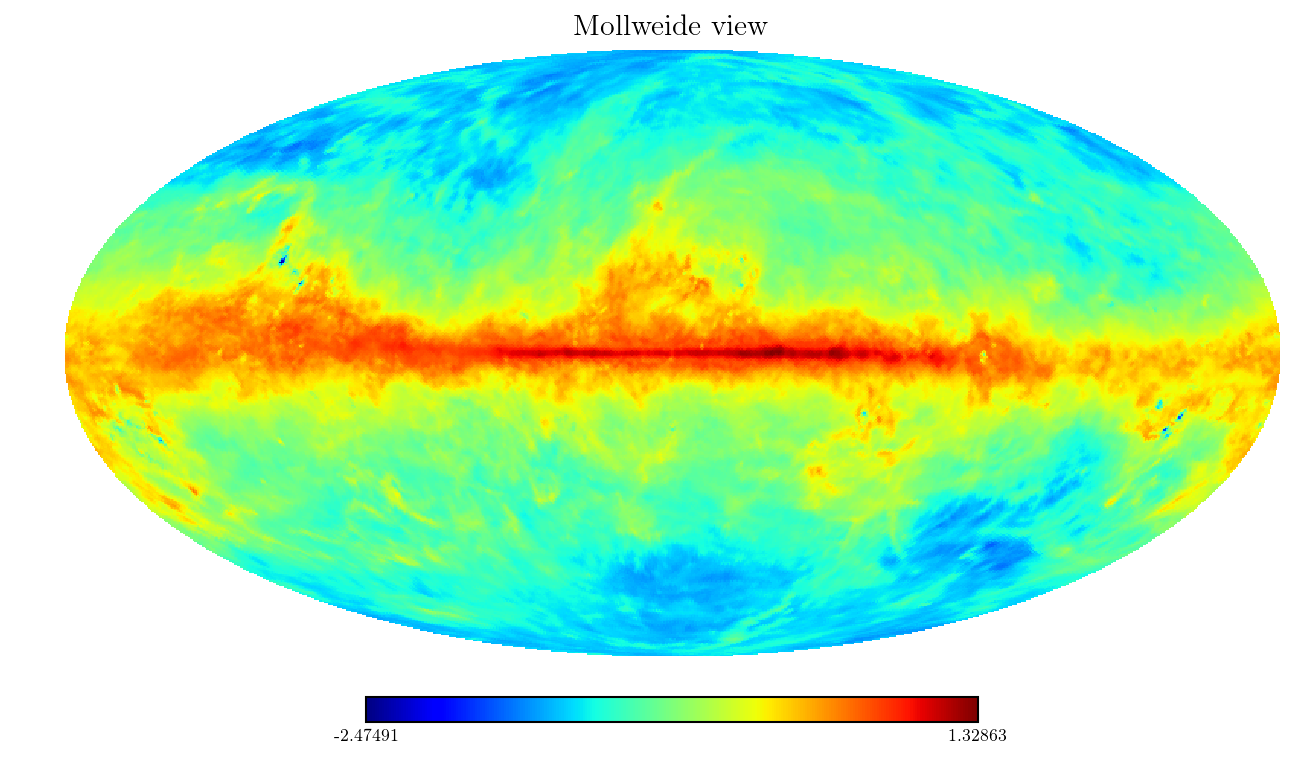

In [210]:
healpy.mollview(np.log10(A.templateList['pi0HIHII'].healpixCube[10]))